# 信用情報の分析

#### 【問題1】コンペティション内容の把握

１.Home Creditはどのような企業？
口座を持っていない顧客の予測した信用情報を企業に提供する会社

２.このコンペティションでは何を予測する？
顧客の返済能力を予測する。

３.それを予測することで企業が得られるメリットは何？
企業は低リスクな債権を作ることができる。

#### 【問題2】データの概観の把握

In [1]:
###################
#インポート
###################

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

###################
#ＣＳＶ表示数の変更
###################

#pd.set_option('display.max_rows', None)    #行（index)全表示
pd.set_option("display.max_columns", None) #列（colums)全表示
#pd.set_option('display.max_rows', 10)       #行（index)の最大表示数を10に変更
#pd.set_option("display.max_columns", 10)  #列（colums)の最大表示数を10に変更

###################
#ＣＳＶインポート
###################

df = pd.read_csv("application_train.csv") #CSVをインポート
display(df) #インポートしたデータを出力


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [2]:
###################
#ディスクリプションＣＳＶインポート
###################

pd.set_option('display.max_rows', None)    #行（index)全表示

df_description = pd.read_csv("description(application_train).csv", encoding="shift-jis") #ディスクリプションCSVをインポート
display(df_description) #インポートしたデータを出力



,Unnamed: 0,Row,説明,スペシャル
0,1,SK_ID_CURR,サンプル内のローンのID,NaN
1,2,TARGET,対象変数（1：支払い困難な顧客：サンプル中のローンの最初のY回のうち少なくとも1回でX日以上...,NaN
2,5,NAME_CONTRACT_TYPE,ローンが現金かリボルビングかの識別,NaN
3,6,CODE_GENDER,顧客の性別,NaN
4,7,FLAG_OWN_CAR,顧客が自動車を所有しているかどうかのフラグ,NaN
5,8,FLAG_OWN_REALTY,家やアパートを所有しているかどうかのフラグ,NaN
6,9,CNT_CHILDREN,顧客の子供の数,NaN
7,10,AMT_INCOME_TOTAL,お客様の収入,NaN
8,11,AMT_CREDIT,ローンの債権額,NaN
9,12,AMT_ANNUITY,ローンの年金額,NaN


・head()、.info()、describe()などを使う

In [3]:
df.head() #先頭（最初）の行を返す

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.info() #先頭（最初）の行を返す

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe() #データフレームの平均、標準偏差四分位数などを取得

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

・欠損値の有無を見る

<AxesSubplot:>

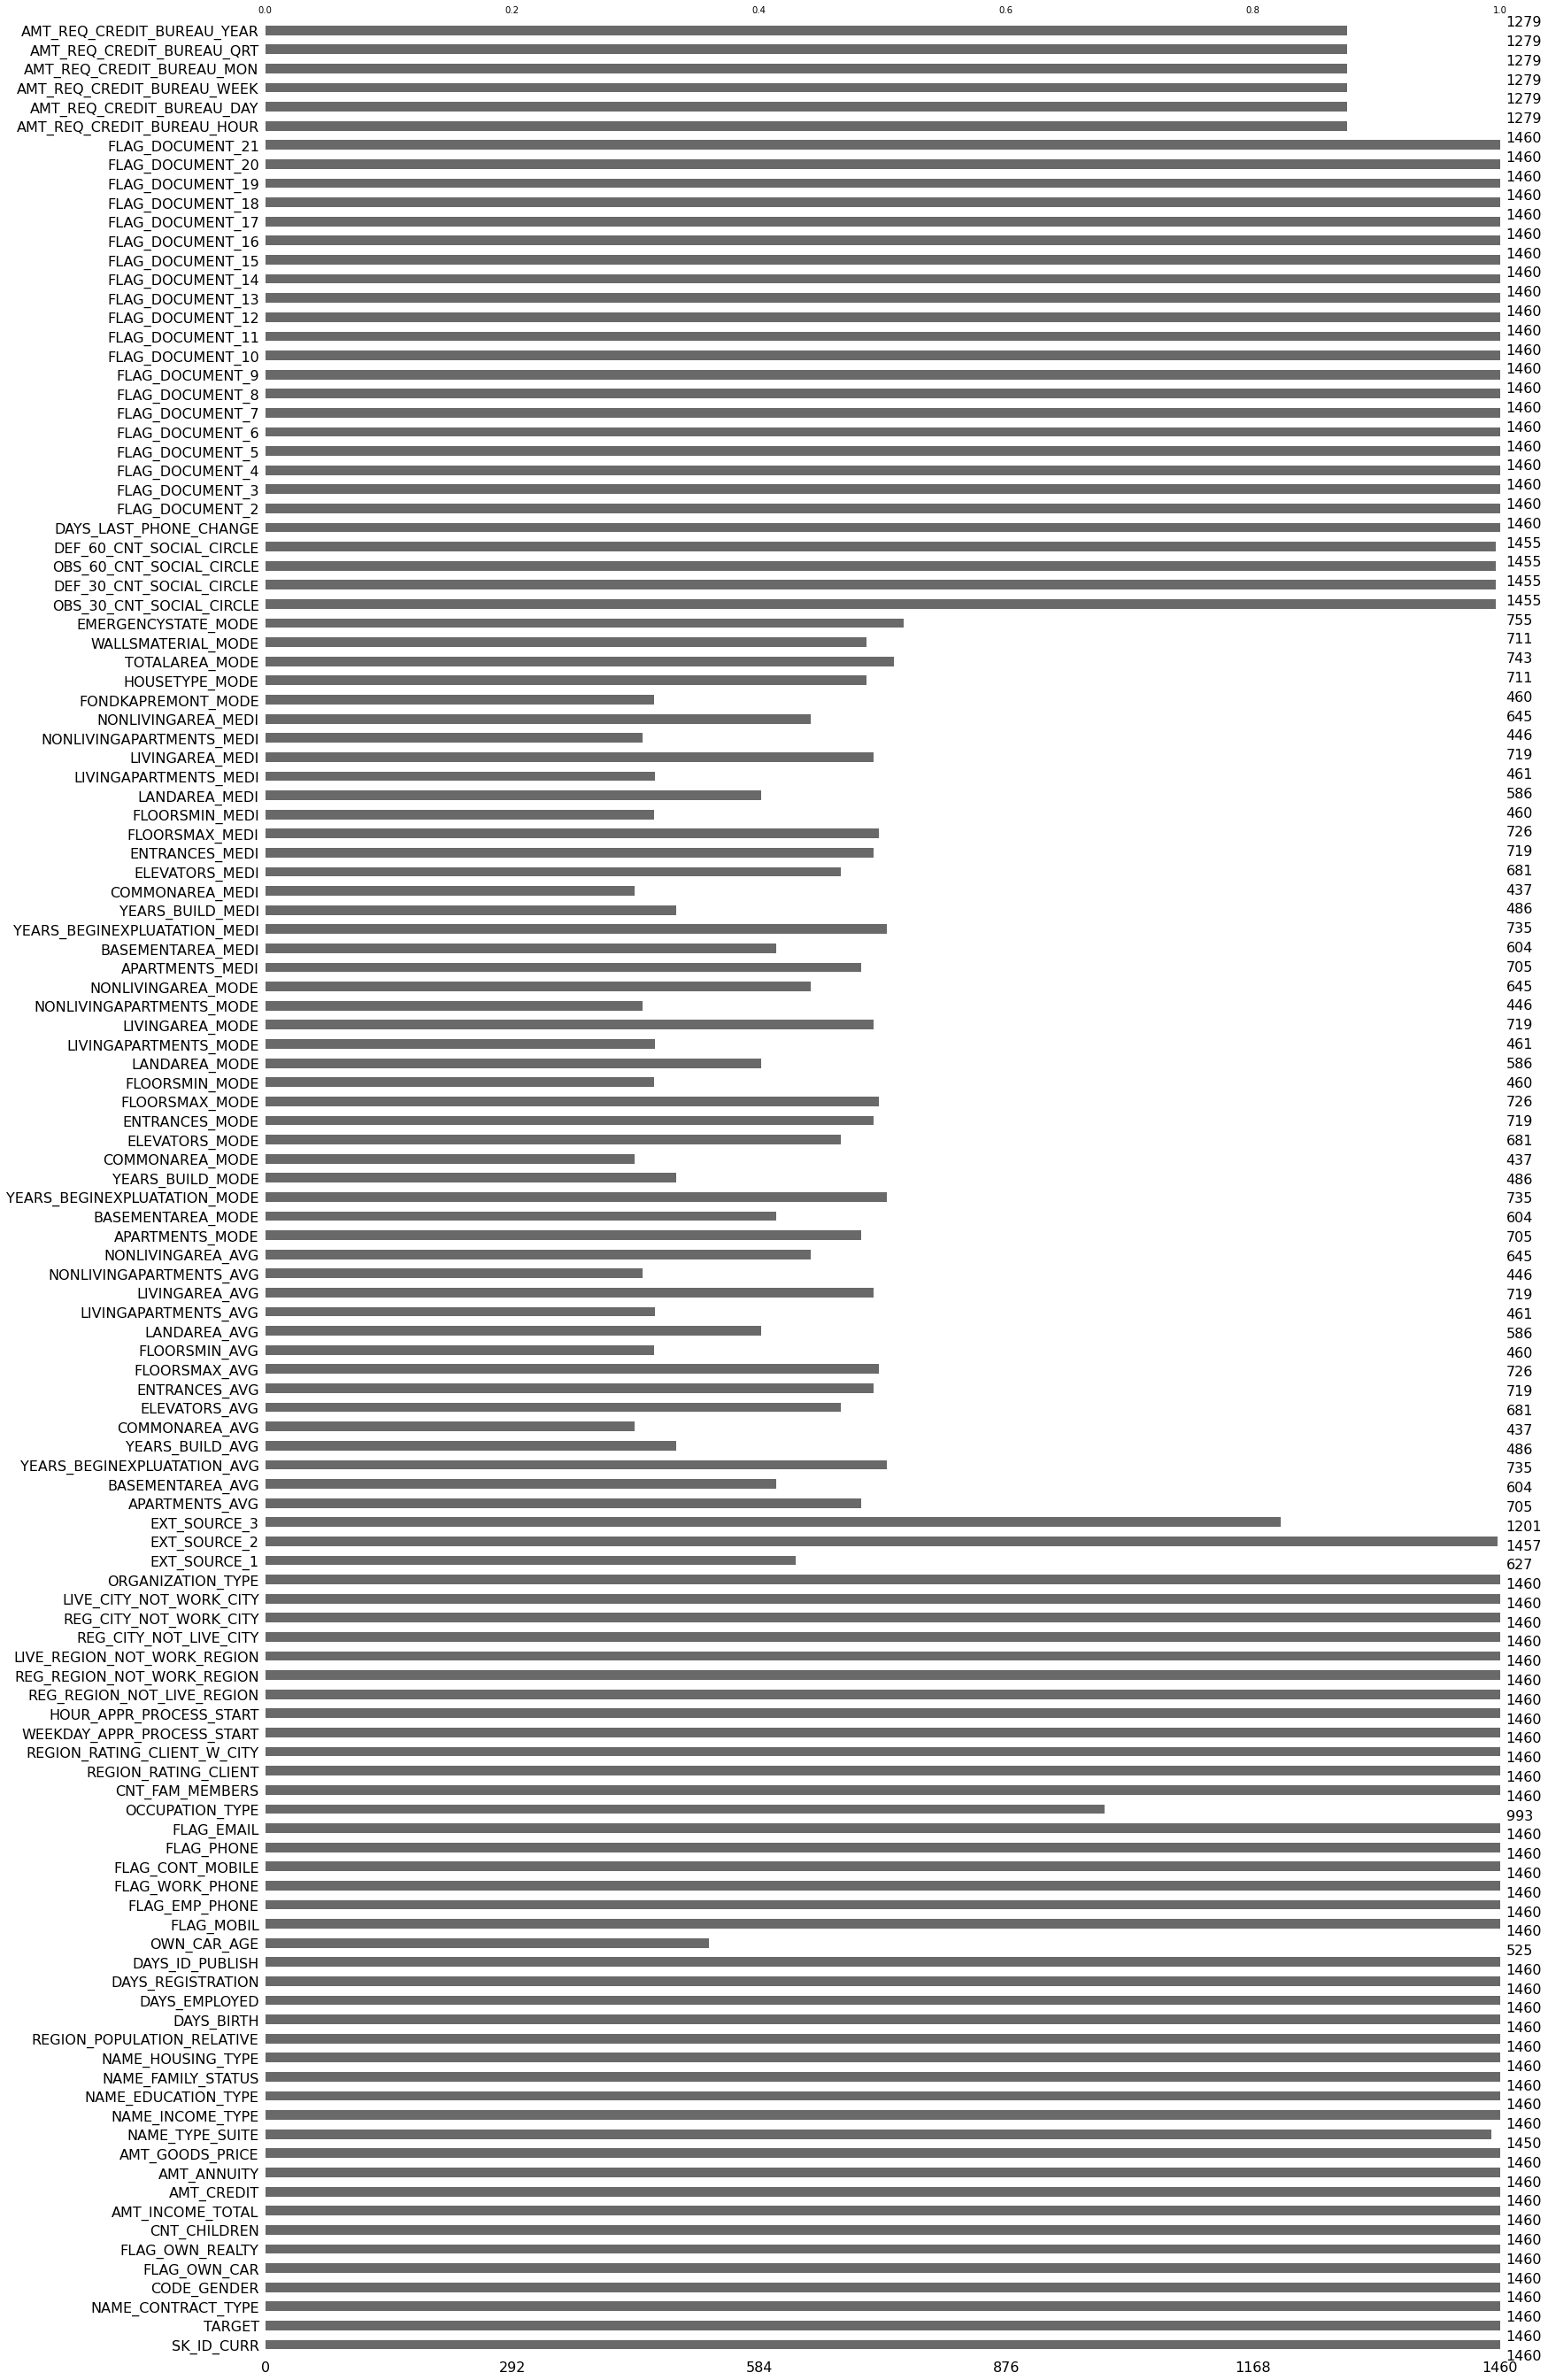

In [6]:
###################
#欠損値について
###################

#----欠損値の棒グラフを表示----
df_missing = df.isnull() #df_missingを欠損値をTrueとするDFとする。
#print(df_missing) #欠損値の有り無しをDFで出力。 True：欠損値有り　False：欠損値無し

msno.bar(df.sample(1460)) #棒グラフで欠損値の数を表示

In [7]:
#----欠損値をデータフレームで表示----

def find_missing(data):
    """
    欠損値を見つける関数
    data：データフレームを引数
    
    
    """
    #count_missingは欠損値の合計を合計を求める。.values()はnumpy配列にする    
    count_missing = data.isnull().sum().values
    
    #totalはで全体の要素数
    total = data.shape[0] 
    
    #ratio_missingは欠損値の割合　欠損数を全体数で割る
    ratio_missing = count_missing / total
    
    #missing_countは欠損値の数、missing_ratioは欠損値の割合を出力している。data以降はカラムのラベル名を決めている　indexはdata（find_missing関数の引数）のカラムを表示させている
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values)# data以降はカラムのラベル名を決めている　indexはdata（find_missing関数の引数）のカラムを表示させている

#【欠損値を見つける関数】の呼び出し
find_missing(df) 

#【欠損値を見つける関数】の表示
display(find_missing(df)) 


,missing_count,missing_ratio
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.000039


In [8]:
#----欠損値の削除工程----
pd.set_option('display.max_rows', 30)       #行（index)の最大表示数を10に変更
#pd.set_option("display.max_columns", None) #列（colums)全表示

#1000以上データがあるカラムは残してそれ以外はaxis=1の列を削除する
del_missing_columns = df.dropna(thresh=1000, axis = 1) 

#インデックスに一つでも欠損値があれば削除する。dropnaはデフォルトがaxis=0
del_missing_columns_deleteindex = del_missing_columns.dropna(how = "any" ) 

#display(del_missing_columns[MiscFeature]) #del_missing_columnsのMiscFeatureカラムを表示させてみる

#欠損値を完全削除したDFのインデックスをリセット
del_missing_columns_align_index = del_missing_columns_deleteindex.reset_index()# del_missing_columns_deleteindexはインデックスが通し番号でない為デフォルトのインデックスにリセット
display(del_missing_columns_align_index)


,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,18,0,0,0,0,0,0,Business Entity Type 3,0.270766,0.707126,0.597192,0.1464,0.1291,0.9861,0.8096,0.1080,0.04,0.0345,0.3333,0.3750,0.0000,0.1194,0.0933,0.0000,0.0000,0.1492,0.1340,0.9861,0.8171,0.1090,0.0403,0.0345,0.3333,0.3750,0.0000,0.1304,0.0972,0.0000,0.0000,0.1478,0.1291,0.9861,0.8121,0.1087,0.04,0.0345,0.3333,0.3750,0.0000,0.1214,0.0949,0.0000,0.0000,reg oper account,block of flats,0.1324,"Stone, brick",No,2.0,1.0,2.0,1.0,-2053.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,Self-employed,0.647045,0.746486,0.739412,0.0928,0.1000,0.9801,0.7280,0.0463,0.00,0.2069,0.1667,0.2083,0.0437,0.0756,0.0903,0.0000,0.0000,0.0945,0.1038,0.9801,0.7387,0.0467,0.0000,0.2069,0.1667,0.2083,0.0447,0.0826,0.0941,0.0000,0.0000,0.0937,0.1000,0.9801,0.7316,0.0466,0.00,0.2069,0.1667,0.2083,0.0445,0.0770,0.0919,0.0000,0.0000,reg oper spec account,block of flats,0.0710,Panel,No,6.0,0.0,6.0,0.0,-1782.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,Managers,2.0,2,2,MONDAY,13,0,0,0,0,0,0,Trade: type 7,0.674832,0.616156,0.673830,0.5845,0.4570,0.9945,0.9252,0.3468,0.60,0.2414,0.9167,0.5000,0.2847,0.4287,0.7187,0.2201

・クラスの割合がわかるグラフを描く

NAME_CONTRACT_TYPEについての考察


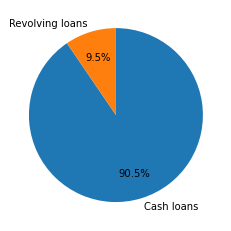

In [9]:
print("NAME_CONTRACT_TYPEについての考察")

#欠損値を省いたDFのNAME_CONTRACT_TYPEをスライスしたDF
df_NAME_CONTRACT_TYPE = pd.DataFrame(del_missing_columns_deleteindex, columns=['NAME_CONTRACT_TYPE'])

#NAME_CONTRACT_TYPEだけをスライスしたDF
df_NAME_CONTRACT_TYPE = del_missing_columns_deleteindex['NAME_CONTRACT_TYPE']

#----グラフの作成----

#円グラフを描くための各ラベルのデータフレーム（df_Cash_loansとdf_Revolving_loansの数を数える）
df_Cash_loans = df.loc[(df['NAME_CONTRACT_TYPE'] == "Cash loans")]           #Cash loansのデータフレーム
df_Revolving_loans = df.loc[(df['NAME_CONTRACT_TYPE'] == 'Revolving loans')] #Revolving loansのデータフレーム

#円グラフをプロット(ここはndarrayのデータになる)
pie_graph = np.array([len(df_Cash_loans), len(df_Revolving_loans)]) #グラフデータのndarray
label = ["Cash loans", "Revolving loans"] #ラベル
plt.pie(pie_graph, labels=label,counterclock=False, startangle=90, autopct="%.1f%%",pctdistance=0.7)
plt.show() #グラフ表示
print("\n") #改行



#### 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定する。

■□課題：ブラックな人間の傾向と特徴を見つける。目的変数と特徴量の相関係数の調査、目的変数と相関係数の高い特徴量同士の相関係数の調査


・目的変数：TARGET（１はブラック、０はホワイト）

・特徴量：目的変数との相関係数が高いものを調査する

        

##### ・各特徴量に関する考察（データの割合、目的変数との関係）

NAME_CONTRACT_TYPE：ローンが現金かリボルビングかの識別

#### 【問題4】データ探索

・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。




<AxesSubplot:>

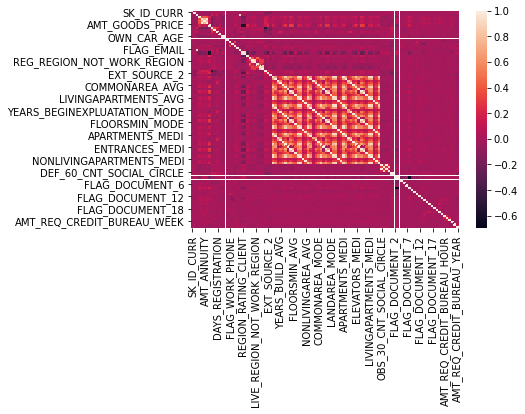

In [10]:
print("・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。")
print("\n")
#corr_dfは欠損値を行列共に削除したDFを使い、相関係数行列にしたもの
corr_df = del_missing_columns_deleteindex.corr() #del_missing_columns_deleteindexを.corr()メソッドで相関係数行列にする。


#欠損値を削除したDFの特徴量同士の相関係数行列を表示する
#print(corr_df)


#相関係数行列のヒートマップを作る　
sns.heatmap(corr_df)
# plt.xlabel("feature values")
# plt.ylabel("feature values")
# plt.title("heatmap")
# plt.pcolor(corr_df)
# plt.show()


In [11]:
#pandasのDataFrameから　TARGET　と相関が高い相関行列上位16件を抽出するメソッド(変数はとりあえずaとしている)
a = corr_df.sort_values(by='TARGET', ascending=False).head(16)

#相関行列上位16位の　TARGET　の列だけスライス
corr_df_only_TARGET = a.loc[:, 'TARGET']

#TARGETと相関が高い上位16位のみ表示
display(corr_df_only_TARGET)

print("上記データフレームの特徴量について考察していく")
print("\n")

TARGET                         1.000000
DAYS_EMPLOYED                  0.062950
REGION_RATING_CLIENT_W_CITY    0.061214
FLAG_DOCUMENT_3                0.054269
REGION_RATING_CLIENT           0.053614
DAYS_BIRTH                     0.041108
AMT_REQ_CREDIT_BUREAU_YEAR     0.033832
OBS_30_CNT_SOCIAL_CIRCLE       0.031041
OBS_60_CNT_SOCIAL_CIRCLE       0.030730
OWN_CAR_AGE                    0.028052
DAYS_ID_PUBLISH                0.024877
DEF_30_CNT_SOCIAL_CIRCLE       0.022807
FLAG_DOCUMENT_7                0.021218
DEF_60_CNT_SOCIAL_CIRCLE       0.020796
DAYS_LAST_PHONE_CHANGE         0.019082
AMT_REQ_CREDIT_BUREAU_QRT      0.016465
Name: TARGET, dtype: float64

上記データフレームの特徴量について考察していく




①DAYS_EMPLOYED：申し込みの何日前に現在の仕事を始めたか

⇒下記表グラフにおける考察について：とにかく働き始めが一番お金がなく、借入の傾向がある。

In [12]:
###################
#ＣＳＶ表示数の変更
###################

#pd.set_option('display.max_rows', None)    #行（index)全表示
#pd.set_option("display.max_columns", None) #列（colums)全表示
pd.set_option('display.max_rows', 50)       #行（index)の最大表示数を10に変更
pd.set_option("display.max_columns", 50)  #列（colums)の最大表示数を10に変更



print(del_missing_columns_deleteindex.loc[:, 'DAYS_EMPLOYED'])



71        -892
124      -4375
152      -2311
161      -4472
255       -602
          ... 
307358   -1105
307359   -2021
307407   -1641
307456   -5452
307482    -226
Name: DAYS_EMPLOYED, Length: 8602, dtype: int64


Skewness :1.769159905494383
Kurtosis :3.98400384732388


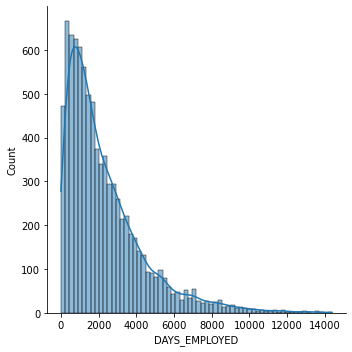

In [13]:
#----関数①----ここから
def Distribution_of_objective_variables(data):
    """
    目的変数の分布を表示し、「尖度」と「歪度」も算出する(seabornのsns.displot()やsns.histplot()を利用)
    ----
    引数：１次元のDF(インデックスは通し番号で揃っていること、カラムは１つのみ)
    ----
    出力：「引数のヒストグラム」、「尖度」、「歪度」
    """
    #sns.displot()は引数を目的変数とし、目的変数の分布図を表示する
    sns.displot(data, kde = True)
    
    data_skew = data.skew()
    data_kurt = data.kurt()
    return data_skew,data_kurt
#----関数①----ここまで

#----関数①の呼び出し----

#使うデータは欠損値完全削除＆インデックスをリセット＆DAYS_EMPLOYEDをスライスしたDF
data_1 = del_missing_columns_align_index['DAYS_EMPLOYED'] * -1 #データが負だと対数変換できない為正の数字に変換

data_skew,data_kurt = Distribution_of_objective_variables( data_1 )

print("Skewness :{}".format(data_skew))#del_missing_columns_deleteindex["SalePrice"]　（行列共に欠損値なしSalePriceのデータフレーム）の歪度を表示させる
print("Kurtosis :{}".format(data_kurt))#del_missing_columns_deleteindex["SalePrice"]　（行列共に欠損値なしSalePriceのデータフレーム）の尖度を表示させる


Skewness : -0.548147780249568
Kurtosis : 0.09114731738073267


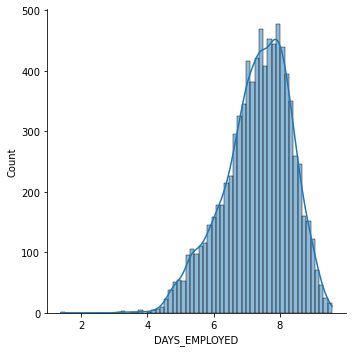

In [14]:
#----関数②----ここから
def Convert_to_logarithmic_lfunction(data):
    """
    引数のデータフレームを対数関数に変換
    引数の分布を表示し、「尖度」と「歪度」も算出する(seabornのsns.displot()やsns.histplot()を利用)
    ----
    引数data：１次元のDF(インデックスは通し番号で揃っていること、カラムは１つのみ)
    ----
    出力：「引数の対数変換ヒストグラム」、「尖度」、「歪度」
    """
    #対数変換
    logarithmic_function = np.log(data) #del_missing_columns_deleteindex_ndarrayはdel_missing_columns_deleteindex["SalePrice"]（欠損値なしのSalePriceのデータフレームをndarrayにしたデータ）
    
    #分布図を表示
    sns.displot(logarithmic_function ,kde = True) #目的変数の分布
    
    logarithmic_function_Skewness = logarithmic_function.skew()
    logarithmic_function_Kurtosis = logarithmic_function.kurt()

    #対数変換したDF、対数変換したDFの尖度、対数変換したDFの歪度を出力
    return logarithmic_function,logarithmic_function_Skewness,logarithmic_function_Kurtosis
#----関数②----ここまで

#----関数②の呼び出し----
logarithmic_function,logarithmic_function_Skewness,logarithmic_function_Kurtosis = Convert_to_logarithmic_lfunction(del_missing_columns_align_index['DAYS_EMPLOYED'] * -1)

print("Skewness :", logarithmic_function_Skewness)
print("Kurtosis :", logarithmic_function_Kurtosis)




②REGION_RATING_CLIENT_W_CITY：都市を考慮した場合のお客様の居住地域に対する評価（1,2,3)

⇒評価は２が一番高かった。仕事をしたばかりの中間層が借入の傾向が多い

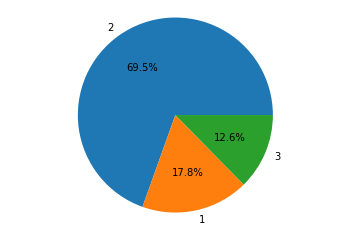

In [15]:
#REGION_RATING_CLIENT_W_CITYだけをスライスしたDF
df_REGION_RATING_CLIENT_W_CITY = del_missing_columns_align_index['REGION_RATING_CLIENT_W_CITY']

#各要素の出現回数を調べる
df_REGION_RATING_CLIENT_W_CITY.value_counts()#.value_counts()メソッドで1.2.3の数を数える

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(df_REGION_RATING_CLIENT_W_CITY.value_counts())

#----グラフの作成----
sizes = df_JobRole['REGION_RATING_CLIENT_W_CITY']
labels =  df_JobRole.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax1.axis('equal')
plt.show()



③FLAG_DOCUMENT_3：ドキュメント３提出の有無

⇒ドキュメント３は調べたが記載がなかったので、どんな内容かは不明ですが出した人が多く

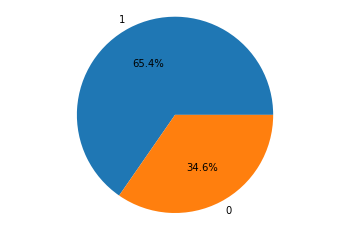

In [16]:
#FLAG_DOCUMENT_3だけをスライスしたDF
df_FLAG_DOCUMENT_3 = del_missing_columns_align_index['FLAG_DOCUMENT_3']

#各要素の出現回数を調べる
df_FLAG_DOCUMENT_3.value_counts()#.value_counts()メソッドで0.1の数を数える

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(df_FLAG_DOCUMENT_3.value_counts())

#----グラフの作成----
sizes = df_JobRole['FLAG_DOCUMENT_3']
labels =  df_JobRole.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax1.axis('equal')
plt.show()

④REGION_RATING_CLIENT：お客様の住んでいる地域に対する評価（1,2,3)

⇒これは②REGION_RATING_CLIENT_W_CITYの都市の考慮を外したデータですが特に大きな町というくくりは関係ないということが分かった。



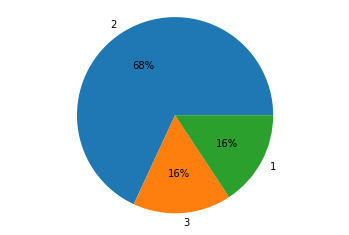

In [17]:
#REGION_RATING_CLIENTだけをスライスしたDF
df_REGION_RATING_CLIENT = del_missing_columns_align_index['REGION_RATING_CLIENT']

#各要素の出現回数を調べる
df_REGION_RATING_CLIENT.value_counts()#.value_counts()メソッドで1.2.3の数を数える

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(df_REGION_RATING_CLIENT.value_counts())

#----グラフの作成----
sizes = df_JobRole['REGION_RATING_CLIENT']
labels =  df_JobRole.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=0)
ax1.axis('equal')
plt.show()

⑤DAYS_BIRTH：申請時のお客様の年齢(日)

⇒グラフを目視して４０代が借り入れが多く、60代20代は少ない傾向にある。

<AxesSubplot:>

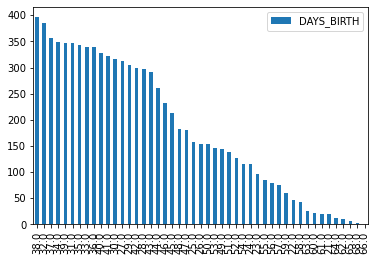

In [18]:
#DAYS_BIRTHだけをスライスしたDF
del_missing_columns_align_index_DAYS_BIRTH = del_missing_columns_align_index['DAYS_BIRTH']

#年齢のデータなので-1をかけて365で割る
del_missing_columns_align_index_DAYS_BIRTH_age = (del_missing_columns_align_index_DAYS_BIRTH * -1)/365
del_missing_columns_align_index_DAYS_BIRTH_round = np.trunc(del_missing_columns_align_index_DAYS_BIRTH_age) #np.trunc()で小数点切り捨て

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(del_missing_columns_align_index_DAYS_BIRTH_round.value_counts())

#----棒グラフの作成----
df_JobRole.plot.bar()


⑥AMT_REQ_CREDIT_BUREAU_YEAR：amount require credit brueau year恐らくクレジットカード有効期限の残り

⇒円グラフの通りクレジットカードの残り年数が多いほど借入していなく期限切れの人が多く借入している傾向がある。

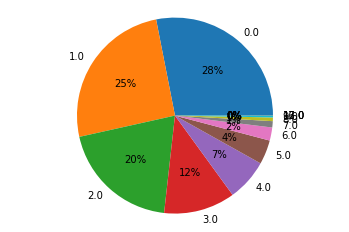

In [19]:
#AMT_REQ_CREDIT_BUREAU_YEARだけをスライスしたDF
df_AMT_REQ_CREDIT_BUREAU_YEAR = del_missing_columns_align_index['AMT_REQ_CREDIT_BUREAU_YEAR']

#各要素の出現回数を調べる(仮にaとする)
a = df_AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()#.value_counts()メソッドで要素の数を数える

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(a)

#----グラフの作成----
sizes = df_JobRole['AMT_REQ_CREDIT_BUREAU_YEAR']
labels =  df_JobRole.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=0)
ax1.axis('equal')
plt.show()

⑦OBS_30_CNT_SOCIAL_CIRCLE：オブス30℃ソーシャルサークル

⇒オブス30℃ソーシャルサークルが何を表しているのか不明だが数字が少ないほうが借り入れが多い

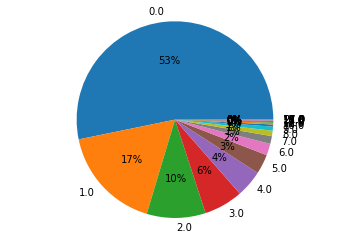

In [20]:
#OBS_30_CNT_SOCIAL_CIRCLEだけをスライスしたDF
df_OBS_30_CNT_SOCIAL_CIRCLE = del_missing_columns_align_index['OBS_30_CNT_SOCIAL_CIRCLE']

#各要素の出現回数を調べる(仮にaとする)
a = df_OBS_30_CNT_SOCIAL_CIRCLE.value_counts()#.value_counts()メソッドで要素の数を数える

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(a)

#----グラフの作成----
sizes = df_JobRole['OBS_30_CNT_SOCIAL_CIRCLE']
labels =  df_JobRole.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=0)
ax1.axis('equal')
plt.show()

⑧OBS_60_CNT_SOCIAL_CIRCLE：オブス60℃ソーシャルサークル

⇒オブス60℃ソーシャルサークルが何を表しているのか不明だが数字が少ないほうが借り入れが多い

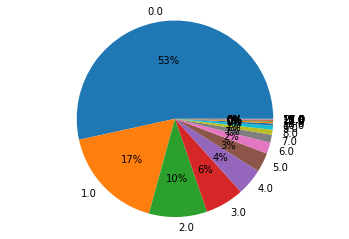

In [21]:
#OBS_60_CNT_SOCIAL_CIRCLEだけをスライスしたDF
df_OBS_60_CNT_SOCIAL_CIRCLE = del_missing_columns_align_index['OBS_60_CNT_SOCIAL_CIRCLE']

#各要素の出現回数を調べる(仮にaとする)
a = df_OBS_60_CNT_SOCIAL_CIRCLE.value_counts()#.value_counts()メソッドで要素の数を数える

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(a)

#----グラフの作成----
sizes = df_JobRole['OBS_60_CNT_SOCIAL_CIRCLE']
labels =  df_JobRole.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=0)
ax1.axis('equal')
plt.show()

⑨OWN_CAR_AGE：お客様の車の年式

⇒これは円グラフを見ると長く車を使っている人ほど借入が少ない傾向にある

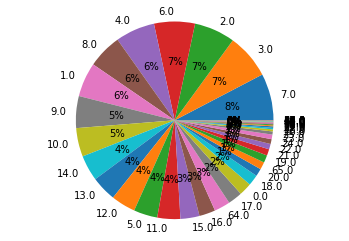

In [22]:
#OWN_CAR_AGEだけをスライスしたDF
df_OWN_CAR_AGE = del_missing_columns_align_index['OWN_CAR_AGE']

#各要素の出現回数を調べる(仮にaとする)
a = df_OWN_CAR_AGE.value_counts()#.value_counts()メソッドで要素の数を数える

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(a)

#----グラフの作成----
sizes = df_JobRole['OWN_CAR_AGE']
labels =  df_JobRole.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=0)
ax1.axis('equal')
plt.show()

⑩DAYS_ID_PUBLISH：申し込みの何日前に、ローンを申し込む際の身分証明書を変更したか

⇒下記棒グラフから3000-4000日前に身分証を変更した人が多い。身分証明書を変更して１年未満の人は借り入れをする傾向がある。

<AxesSubplot:>

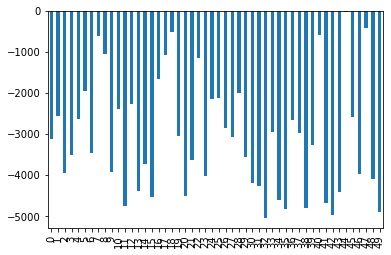

In [23]:
#DAYS_ID_PUBLISHだけをスライスしたDF
df_DAYS_ID_PUBLISH = del_missing_columns_align_index['DAYS_ID_PUBLISH']

#今回は数が多いので200をランダムにサンプリングし、.reset_index()メソッドでインデックスをリセットする。
c = df_DAYS_ID_PUBLISH.sample(n=50).reset_index()

#インデックスをリセットし、再度DAYS_ID_PUBLISHのみスライスする（通しでない番号がindexのカラムで入っている為。プリントすればわかる）
d = c['DAYS_ID_PUBLISH']

#各要素の出現回数を調べる(仮にaとする)
a = d.value_counts()#.value_counts()メソッドで要素の数を数える
b = np.trunc(a) #np.trunc()で小数点切り捨て
#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(b)

#----棒グラフの作成----
d.plot.bar()


⑪DEF_30_CNT_SOCIAL_CIRCLE：

⇒デフ30℃ソーシャルサークルが何を表しているのか不明だがほぼ０が多い

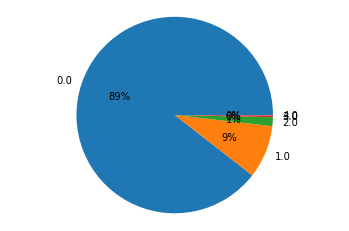

In [24]:
#DEF_30_CNT_SOCIAL_CIRCLEだけをスライスしたDF
df_DEF_30_CNT_SOCIAL_CIRCLE = del_missing_columns_align_index['DEF_30_CNT_SOCIAL_CIRCLE']

#各要素の出現回数を調べる(仮にaとする)
a = df_DEF_30_CNT_SOCIAL_CIRCLE.value_counts()#.value_counts()メソッドで要素の数を数える

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(a)

#----グラフの作成----
sizes = df_JobRole['DEF_30_CNT_SOCIAL_CIRCLE']
labels =  df_JobRole.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=0)
ax1.axis('equal')
plt.show()

⑫FLAG_DOCUMENT_7：ドキュメント７提出の有無

⇒これもFLAG_DOCUMENT_3同様ドキュメントの中身は不明だがほぼ未提出のようです。

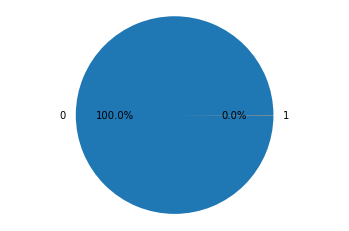

In [25]:
#FLAG_DOCUMENT_7だけをスライスしたDF
df_FLAG_DOCUMENT_7 = del_missing_columns_align_index['FLAG_DOCUMENT_7']

#各要素の出現回数を調べる
df_FLAG_DOCUMENT_7.value_counts()#.value_counts()メソッドで0.1の数を数える

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(df_FLAG_DOCUMENT_7.value_counts())

#----グラフの作成----
sizes = df_JobRole['FLAG_DOCUMENT_7']
labels =  df_JobRole.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax1.axis('equal')
plt.show()

⑬DEF_60_CNT_SOCIAL_CIRCLE

⇒デフ60℃ソーシャルサークルが何を表しているのか不明だがほぼ０が多い

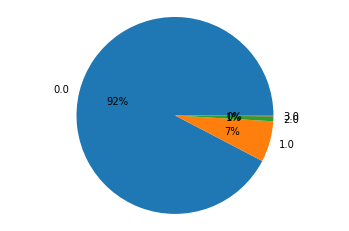

In [26]:
#DEF_60_CNT_SOCIAL_CIRCLEだけをスライスしたDF
df_DEF_60_CNT_SOCIAL_CIRCLE = del_missing_columns_align_index['DEF_60_CNT_SOCIAL_CIRCLE']

#各要素の出現回数を調べる(仮にaとする)
a = df_DEF_60_CNT_SOCIAL_CIRCLE.value_counts()#.value_counts()メソッドで要素の数を数える

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(a)

#----グラフの作成----
sizes = df_JobRole['DEF_60_CNT_SOCIAL_CIRCLE']
labels =  df_JobRole.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=0)
ax1.axis('equal')
plt.show()

⑭DAYS_LAST_PHONE_CHANGE：最終電話変更日数

⇒日本と同じ感覚か分からないが２年前後で番号を変えている人が多い。番号が変わる顧客は借り入れの傾向が強い。

<AxesSubplot:>

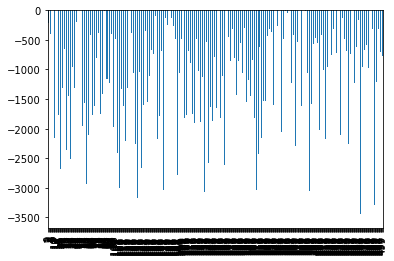

In [27]:
#DAYS_LAST_PHONE_CHANGEだけをスライスしたDF
df_DAYS_LAST_PHONE_CHANGE = del_missing_columns_align_index['DAYS_LAST_PHONE_CHANGE']

#今回は数が多いので200をランダムにサンプリングし、.reset_index()メソッドでインデックスをリセットする。
c = df_DAYS_LAST_PHONE_CHANGE.sample(n=500).reset_index()

#インデックスをリセットし、再度DAYS_LAST_PHONE_CHANGEのみスライスする（通しでない番号がindexのカラムで入っている為。プリントすればわかる）
d = c['DAYS_LAST_PHONE_CHANGE']

#各要素の出現回数を調べる(仮にaとする)
a = d.value_counts()#.value_counts()メソッドで要素の数を数える
b = np.trunc(a) #np.trunc()で小数点切り捨て
#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(b)

#----棒グラフの作成----
d.plot.bar()


⑮AMT_REQ_CREDIT_BUREAU_QRT：amount require CREDIT BUREAU QRT

⇒amount require CREDIT BUREAU QRTが何を表しているのか不明だがほぼ０が多い

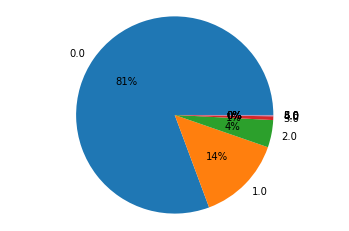

In [28]:
#AMT_REQ_CREDIT_BUREAU_QRTだけをスライスしたDF
df_AMT_REQ_CREDIT_BUREAU_QRT = del_missing_columns_align_index['AMT_REQ_CREDIT_BUREAU_QRT']

#各要素の出現回数を調べる(仮にaとする)
a = df_AMT_REQ_CREDIT_BUREAU_QRT.value_counts()#.value_counts()メソッドで要素の数を数える

#円グラフにする為、上記出現回数をデータフレームにする
df_JobRole = pd.DataFrame(a)

#----グラフの作成----
sizes = df_JobRole['AMT_REQ_CREDIT_BUREAU_QRT']
labels =  df_JobRole.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=0)
ax1.axis('equal')
plt.show()